In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [11]:
X = np.concatenate([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])
# np.stack((X_train, X_test)).shape

In [23]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, test_size=0.2)

In [13]:
X_train.shape, X_valid.shape, X_test.shape

((44800, 28, 28), (11200, 28, 28), (14000, 28, 28))

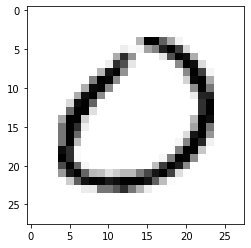

In [18]:
plt.imshow(X_train[4], cmap=plt.cm.binary)
plt.show()

In [32]:
X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

Y_train = to_categorical(Y_train)
Y_valid = to_categorical(Y_valid)
Y_test = to_categorical(Y_test)

In [21]:
X_train.shape, Y_train.shape

((44800, 784), (44800, 10))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

RandomForestClassifier()

DecisionTreeClassifier()

In [31]:
rf_model.score(X_test, Y_test), dt_model.score(X_test, Y_test)

(0.9682857142857143, 0.8717857142857143)

In [36]:
input_shape = X_train.shape[1:]
output_shape = Y_train.shape[-1]
first_model = Sequential()
first_model.add(Dense(100, activation='relu', input_shape=(784, )))
# first_model.add(Dense(100, activation='relu', input_shape=X_train.shape[1:]))
first_model.add(Dense(50, activation='sigmoid'))
first_model.add(Dense(10, activation='softmax'))
# first_model.add(Dense(Y_train.shape[-1], activation='softmax'))
first_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
first_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = first_model.fit(X_train, Y_train, epochs=20, batch_size=200, validation_data=(X_valid, Y_valid))

Epoch 1/20
224/224 [==============================] - 2s 10ms/step - loss: 0.2283 - accuracy: 0.9323 - val_loss: 0.2323 - val_accuracy: 0.9319
Epoch 2/20
224/224 [==============================] - 1s 4ms/step - loss: 0.2140 - accuracy: 0.9373 - val_loss: 0.2177 - val_accuracy: 0.9336
Epoch 3/20
224/224 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9419 - val_loss: 0.1996 - val_accuracy: 0.9404
Epoch 4/20
224/224 [==============================] - 1s 3ms/step - loss: 0.1877 - accuracy: 0.9440 - val_loss: 0.2009 - val_accuracy: 0.9413
Epoch 5/20
224/224 [==============================] - 1s 4ms/step - loss: 0.1782 - accuracy: 0.9468 - val_loss: 0.1928 - val_accuracy: 0.9439
Epoch 6/20
224/224 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.9491 - val_loss: 0.1793 - val_accuracy: 0.9482
Epoch 7/20
224/224 [==============================] - 1s 4ms/step - loss: 0.1632 - accuracy: 0.9499 - val_loss: 0.1911 - val_accuracy: 0.9457
Epoch

In [42]:
first_model.evaluate(X_test, Y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.1500 - accuracy: 0.9568


[0.1499578207731247, 0.9567857384681702]

In [54]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X = np.concatenate([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])

X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, test_size=0.2)

# plt.imshow(X_train[7], cmap=plt.cm.binary)
# plt.show()

X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

Y_train = to_categorical(Y_train)
Y_valid = to_categorical(Y_valid)
Y_test = to_categorical(Y_test)



In [56]:
input_shape = X_train.shape[1:]
output_shape = Y_train.shape[-1]
second_model = Sequential()
second_model.add(Dense(512, activation='sigmoid', input_shape=(784, )))
second_model.add(Dense(256, activation='relu'))
second_model.add(Dense(10, activation='softmax'))
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# second_model.summary()
history = second_model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_valid, Y_valid))


Epoch 1/10
700/700 [==============================] - 13s 5ms/step - loss: 0.7934 - accuracy: 0.6972 - val_loss: 0.7520 - val_accuracy: 0.7073
Epoch 2/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7643 - accuracy: 0.7095 - val_loss: 0.7558 - val_accuracy: 0.6982
Epoch 3/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7478 - accuracy: 0.7097 - val_loss: 0.7091 - val_accuracy: 0.7116
Epoch 4/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7490 - accuracy: 0.7072 - val_loss: 0.7697 - val_accuracy: 0.7021
Epoch 5/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7285 - accuracy: 0.7212 - val_loss: 0.7462 - val_accuracy: 0.6937
Epoch 6/10
700/700 [==============================] - 3s 5ms/step - loss: 0.6969 - accuracy: 0.7371 - val_loss: 0.7059 - val_accuracy: 0.7372
Epoch 7/10
700/700 [==============================] - 3s 5ms/step - loss: 0.6764 - accuracy: 0.7395 - val_loss: 0.7200 - val_accuracy: 0.7154
Epoch

In [57]:
second_model.evaluate(X_test, Y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.6738 - accuracy: 0.7338


[0.6737626791000366, 0.7337856888771057]

3

3

3

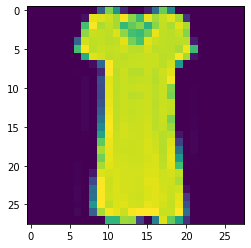

In [65]:
plt.imshow(X_test[0].reshape(28, 28))
np.argmax(Y_test[0])
np.argmax(second_model.predict(X_test)[0])
np.argmax(second_model.predict(X_test[[0]]))